# Introduction

This dataset name GoFord Bike Share is a dataset which give us an information about trip of users within a period of time.
The dataset consist of several columns in which i am going to focused on features that will answers the bellow questions

The idea of this project is to be able to to determined what influenced the bike trip dataset

In [1]:
#### Importing libraries
import pandas as pd
import numpy as np
import seaborn as snb
import matplotlib.pyplot as plt

In [3]:
#read the dataset
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [4]:
#copy the original dataset
df2 = df.copy()

In [5]:
#Convert the start and end time data type to date format
df2["start_time"] = pd.to_datetime(df2['start_time'], format = '')
df2["end_time"] = pd.to_datetime(df2['end_time'], format = '')

In [6]:
#create a new column & extract year from start year & end year and format it to year
df2['start_year'] = df2['start_time'].dt.year
df2['end_year'] = df2['start_time'].dt.year

In [7]:
#create a new column & extract month from start year & end year and format it to date
df2['start_month'] = df2['start_time'].dt.month_name()
df2['end_month'] = df2['start_time'].dt.month_name()

In [8]:
#create a new column & extract week_day from start year & end year
df2['start_weekday'] = df2['start_time'].dt.day_name()
df2['end_weekday'] = df2['start_time'].dt.day_name()

In [9]:
#drop all the null values
#drop all the null values
df2.dropna(axis = 0, inplace = True)

In [10]:
#Convert duration_seconds to hours and rename it
df2['duration_sec'] = df2['duration_sec']/60
df2.rename(columns = {'duration_sec':'duration_hour'}, inplace = True)

In [11]:
#Create a new column & extract hours from start time column and change the datatype to hour
df2['start_hour'] = df2['start_time'].dt.hour

In [12]:
#Get the users that were born after 1925
age = df2[df.member_birth_year > 1925]
age

C:\Users\user\AppData\Local\Temp/ipykernel_15440/3402351106.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  age = df2[df.member_birth_year > 1925]


,duration_hour,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,start_year,end_year,start_month,end_month,start_weekday,end_weekday,start_hour
0,869.750000,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,1984.0,Male,No,2019,2019,February,February,Thursday,Thursday,17
2,1030.900000,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,1972.0,Male,No,2019,2019,February,February,Thursday,Thursday,12
3,608.166667,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,1989.0,Other,No,2019,2019,February,February,Thursday,Thursday,17
4,26.416667,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,1974.0,Male,Yes,2019,2019,February,February,Thursday,Thursday,23
5,29.883333,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,1959.0,Male,No,2019,2019,February,February,Thursday,Thursday,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,8.000000,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,...,1996.0,Male,No,2019,2019,February,February,Friday,Friday,0
183408,5.216667,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,...,1984.0,Male,No,2019,2019,February,February,Friday,Friday,0
183409,2.350000,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,...,1990.0,Male,Yes,2019,2019,February,February,Friday,Friday,0
183410,2.316667,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,...,1988.0,Male,No,2019,2019,February,February,Friday,Friday,0


In [13]:
#Drop users who were born before 1925
df2.drop(df2[(df2.member_birth_year < 1925)].index, inplace = True)

In [14]:
#Create Age column and extract the age of users
df2['Age'] = 2022 - df2.member_birth_year

In [15]:
#Delete the unusefull columns
df2 = df2.drop(['start_station_id','start_station_name','start_time','end_time','bike_id','start_station_latitude','start_station_longitude', 'end_station_id',
         'end_station_name', 'end_station_latitude', 'end_station_longitude','member_birth_year','start_station_id'], axis =1)

In [24]:
#visualization functions
#function for daily frequency for start & end week
def weekPlot():
     snb.set()
     fig, ax = plt.subplots(1,2, figsize = (12,6), sharex = True)
     fig.suptitle('BIKE USERS DAILY TRIP COUNT')

     snb.countplot( data = df2, y= 'start_weekday',ax = ax[0], color = 'blue')
     ax[0].set_title('BIKE USERS DAILY TRIP COUNT FOR START WEEK')
     ax[0].set_ylabel('START WEEK DAY')
     ax[0].set_xlabel('FREQUENCY')

     
     snb.countplot( data = df2, y= 'end_weekday', color = 'yellow', ax = ax[1])
     ax[1].set_ylabel('END WEEK DAY')
     ax[1].set_xlabel('FREQUENCY')
     ax[1].set_title('BIKE USERS END_MONTH WITH HIGHEST PATRONAGE')
     plt.show()
        
#function for monthly frequency for start & end month
def monthPlot():
     snb.set()
     fig, ax = plt.subplots(1,2, figsize = (12,5), sharex = True)
     fig.suptitle('BIKE USERS WITH HIGHEST START AND END MONTH COUNT')

     snb.countplot( data = df2, x= 'start_month',ax = ax[0])
     ax[0].set_title('BIKE USERS START_MONTH WITH HIHGEST PATRONAGE')
    
     snb.countplot( data = df2, x= 'end_month', color = 'yellow', ax = ax[1])
     ax[1].set_title('BIKE USERS END_MONTH WITH HIGHEST PATRONAGE')
     plt.show()
    
    
#function for yearly frequency for start & end year  
def yearPlot():
    snb.set()
    fig, ax = plt.subplots(1,2, figsize = (12,5), sharex = True)
    fig.suptitle('BIKE USERS WITH HIGHEST START AND END YEAR COUNT')
    snb.countplot( data = df2, x= 'end_year',ax = ax[0])
    ax[0].set_title('BIKE USERS END_YEAR WITH HIHGEST PATRONAGE')
   
    snb.countplot( data = df2, x= 'start_year', color = 'yellow', ax = ax[1])
    ax[1].set_title('BIKE USERS START_YEAR WITH HIGHEST PATRONAGE')
    plt.show()
    
    
#function for gender relationship with usertype & bike share durations    
def pointChart():
    snb.set()
    fig, ax = plt.subplots(1,2, figsize = (12,5), sharex = True)
    fig.suptitle('GENDER RELATIONSHIP WITH BIKE SHARE & USER TYPE DURATIONS')
    snb.pointplot(data = df2, x = 'member_gender', y = 'duration_hour', lines = '',hue = 'user_type',dodge = 0.4, ax =ax[0])
    ax[0].set_yticklabels([], minor = True)
    ax[0].set_title('GENDER RELATIONSHIP BETWEEN USER TYPE & DURATION')
    
    snb.pointplot(data = df2, x = 'member_gender', y = 'duration_hour', lines = '',hue = 'bike_share_for_all_trip', dodge = 0.4)
    ax[1].set_yticklabels([], minor = True)
    ax[1].set_title('GENDER RELATIONSHIP WITH BIKE SHARE & DURATION')
    plt.show()
    
#check which usertype used travel most    
def countPlot():
    plt.figure(figsize = (4,5))
    ax = snb.countplot(data = df2, x = 'user_type')
    plt.title('Subscriber & Customer Count')
    plt.xlabel('USER TYPE')
    plt.ylabel('Count')
    plt.show()
    
#only Subscriber share bike with fewer numbers function
def usertypePlot():
    plt.title('RELATIONSHIP Between USER TYPE & BIKE SHARE')
    ax = snb.countplot(x = 'user_type', hue = 'bike_share_for_all_trip', data = df2 )
    plt.xlabel('USER TYPE')
    plt.ylabel('Count')
    plt.show()
    
#lets check if which age group dominated the gender function
def countAgeGender():
    ax = snb.barplot(data = df2, y ='Age', x = 'member_gender')
    plt.title('Age & Gender Relationship')
    plt.xlabel('GENDER')
    plt.ylabel('AGE')
    plt.show()
    
#lets check the ade ranges using user typer function
def usertyypeAge():
    ax = snb.barplot(data = df2, y ='Age', x = 'user_type')
    plt.title('CUSTOMER TYPE VS AGE RANGES')
    plt.xlabel('USER YPE')
    plt.ylabel('AGE')
    plt.show()
    
    
#Lets check the frequency of the age function
def countAge():
    plt.hist(x ='Age', data = df2, bins = 20)
    plt.title('Age Distribution')
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.show()
    
    
#customers has mean longer hours compare to subscribers like Other gender has the highest duration hours
def usertypeGender():
    snb.catplot(x = 'member_gender', y = 'duration_hour', col ='user_type', data = df2, kind = 'bar')
    plt.show()

### Frequency of trip per day
Considering frequency of when bike users start the trip, Bike users use more bike on thursday followed by tuesday but however, bike users hardly goes out during weekend

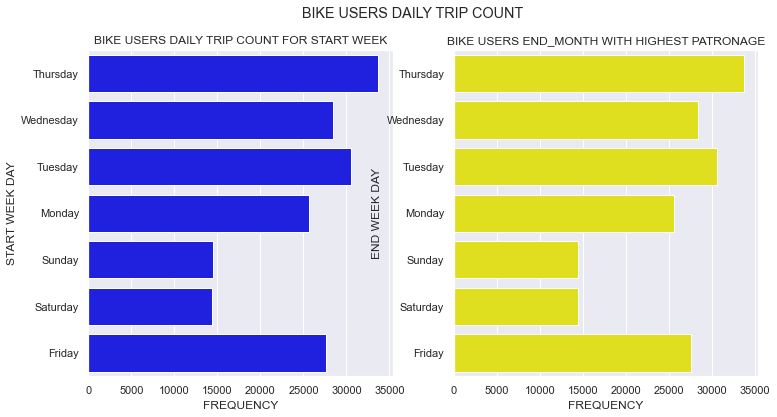

In [18]:
weekPlot()

### BIKE TRIP IN MONTHS
As we can see in the visualization,all the trip started and ends in February which means the month of february have influence on the analysis, february can be more focused on because they do have more sales

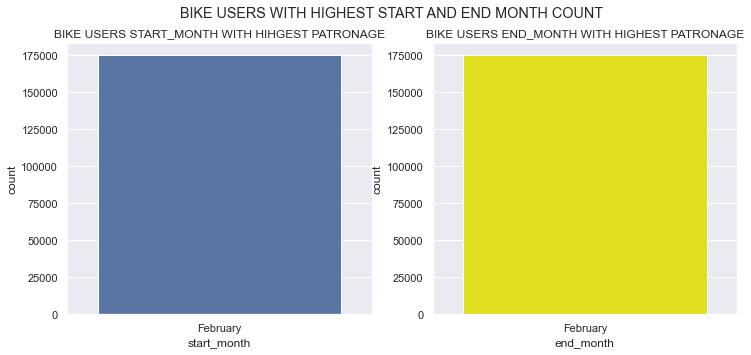

In [19]:
monthPlot()

### Highest patronage for both start & end YEAR, 
Most of the trip started and ends in 2019 which implies that there are more activities in 2019 compared to other years 

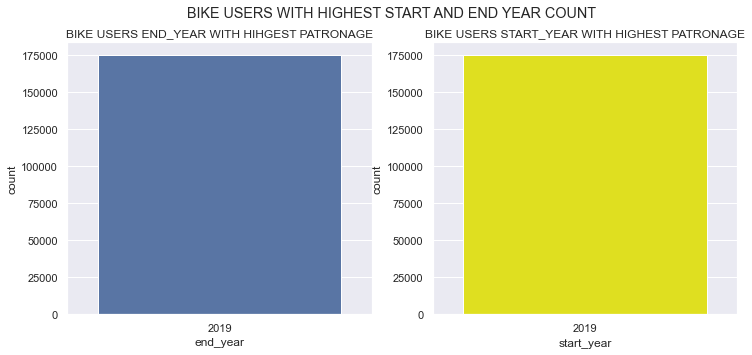

In [20]:
yearPlot()

### Distribution of rides base on user type
Its obviously shown that the Subscriber are the major users of the bike which implies that subcriber has more influence in the analysis

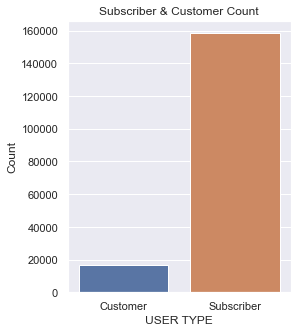

In [25]:
#check which usertype used travel most 
countPlot()

# Bivariate Exploration

### Frequency of user type with bike share
It is clearly shown that few numbers of subscrber among the bike users do share thier bike, Customer does not share bike. we can say customers are not allowed to share bike

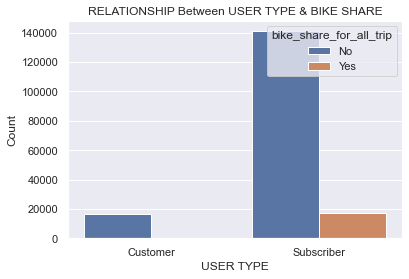

In [26]:
#only Subscriber share bike with fewer numbers
usertypePlot()

### Relationship between age & gender
it is obviously shows that gender almost shared the age equally, it is suprising that other gender has higher ages compared to other gender and all the gender are youth, therefore we can convienently says youth are the real users and will surely have influence in the analysis

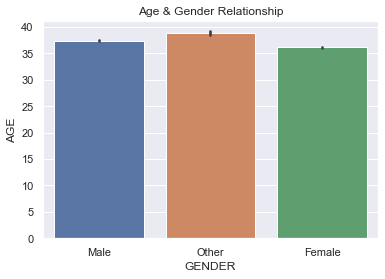

In [28]:
#lets check if which age group dominated the gender
countAgeGender()

### Age ranges with user type relationship
Age is a key influence in the analysis which it can never bee underrated. Both the Users(Customer and Consumer)of the bike were youth. Elder people do not use bike.

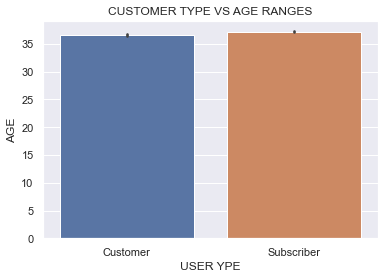

In [29]:
#lets check the ade ranges using user typer
usertyypeAge()

### Distribution of age with count
Age bracket of 25 to 50 are the major users of the bike, older people find it difficult to use the bike

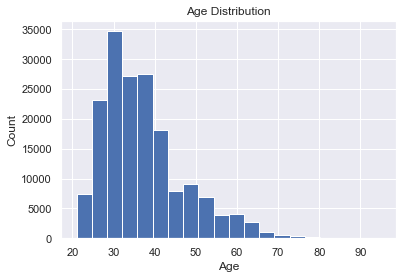

In [30]:
#Lets check the frequency of the age
countAge()

# Multivirate Exploration

### Hours of trips in relationship with user type
it is observed that Customer has higher mean duration compared to Subcriber, which means customer do take longer trip compared to subscriber

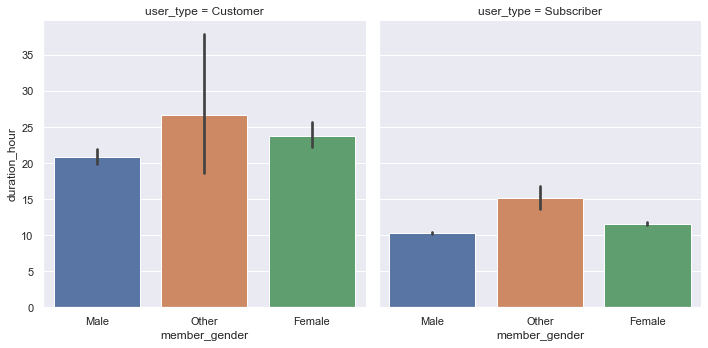

In [31]:
#customers has mean longer hours compare to subscribers like Other gender has the highest duration hours
usertypeGender()

###  Age with duration in respest to user type
Observation shows that Subscriber uses bike more than Customer, subscriber have longer durations compared to customer. Young people spent long hours duration on bike compared to older people

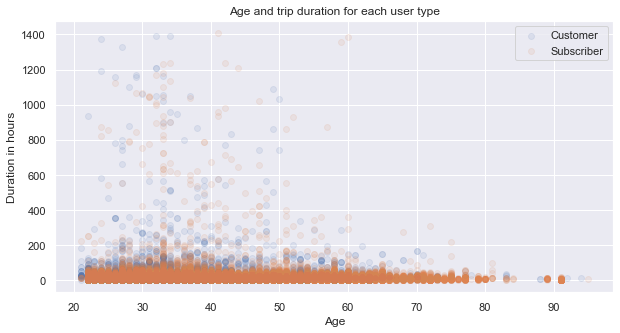

In [32]:
#older users spent short hours on ride why young users spent much hours and the customer type has the highest user duration
df2 = df2.sample(174877, random_state = 1)
plt.figure(figsize = [10,5]);
user_type_markers = [['Customer', 'o'],['Subscriber', 'x']]
for cat, marker in user_type_markers:
    df_cat = df2[df2['user_type'] == cat]
    plt.scatter(data = df_cat, x = 'Age', y = 'duration_hour', alpha = 2/20);
    plt.legend(['Customer', 'Subscriber']);
    plt.xlabel('Age');
    plt.ylabel('Duration in hours');
    plt.title('Age and trip duration for each user type');


### Distribution of gender in respect to bike share & duration
The other gender both in duration & bike share  spent more hours on trip followed by female and male
 it is observed that  for both customer and subscriber, Other gender spent more hours on trip compared to female and male and customer spend more duration on trip

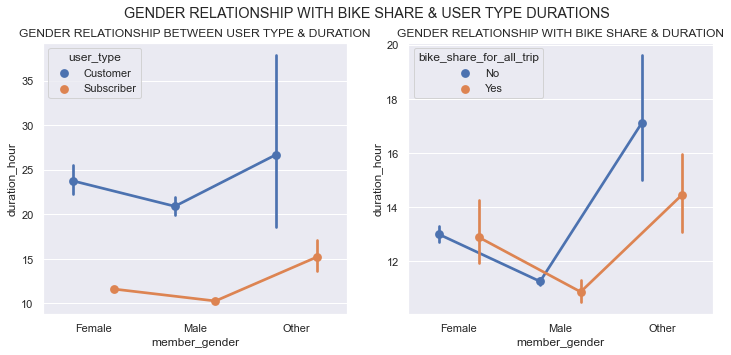

In [33]:
pointChart()

In [34]:
!jupyter nbconvert Explanatory-pt2.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook taofik.ipynb to slides
[NbConvertApp] Writing 834665 bytes to taofik.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\users\user\appdata\local\programs\python\python39\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\user\AppData\Local\Programs\Python\Python39\Scripts\jupyter-nbconvert.EXE\__main__.py", line 7, in <module>
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\jupyter_core\application.py", line 254, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\traitlets\config\application.py", line 845, in lau

### DISCUSSION
We having been analysing the dataset with different visualisation and different relationship among the features starting by using count plot to check the days, month and year with hihgest patronage, checking how the gender influence the analysis, pinplot chart was also used to check how user type & gender shared bike and the user_type that is not allowed to check, catplot and histogram were not left out which shows us the hours of duration in relationship with age, gender and user typer.


# CONCLUSSION
Judging from all the analysis,the listed points were deduced from the analysis
Customers have longer duration trip compared to subscriber
it is only subscriber that shared bike
The most bike users are younger people
Most trips were taken on tuesday & thursday
weekend records low patronage
feburary 2019 records the highest patronage
Male were the most user of the bike
85% percent of the trip were taken by subscibers
However, the angle of view of the dataset are sky limited, more exploration can still be done